# Importing The Required Libraries

In [131]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [132]:
try:
    data = pd.read_csv("creditcard.csv")
except FileNotFoundError:
    print("The file was not found. Please check the path.")


In [133]:
data.shape

(284807, 31)

In [134]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [135]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [136]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [138]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

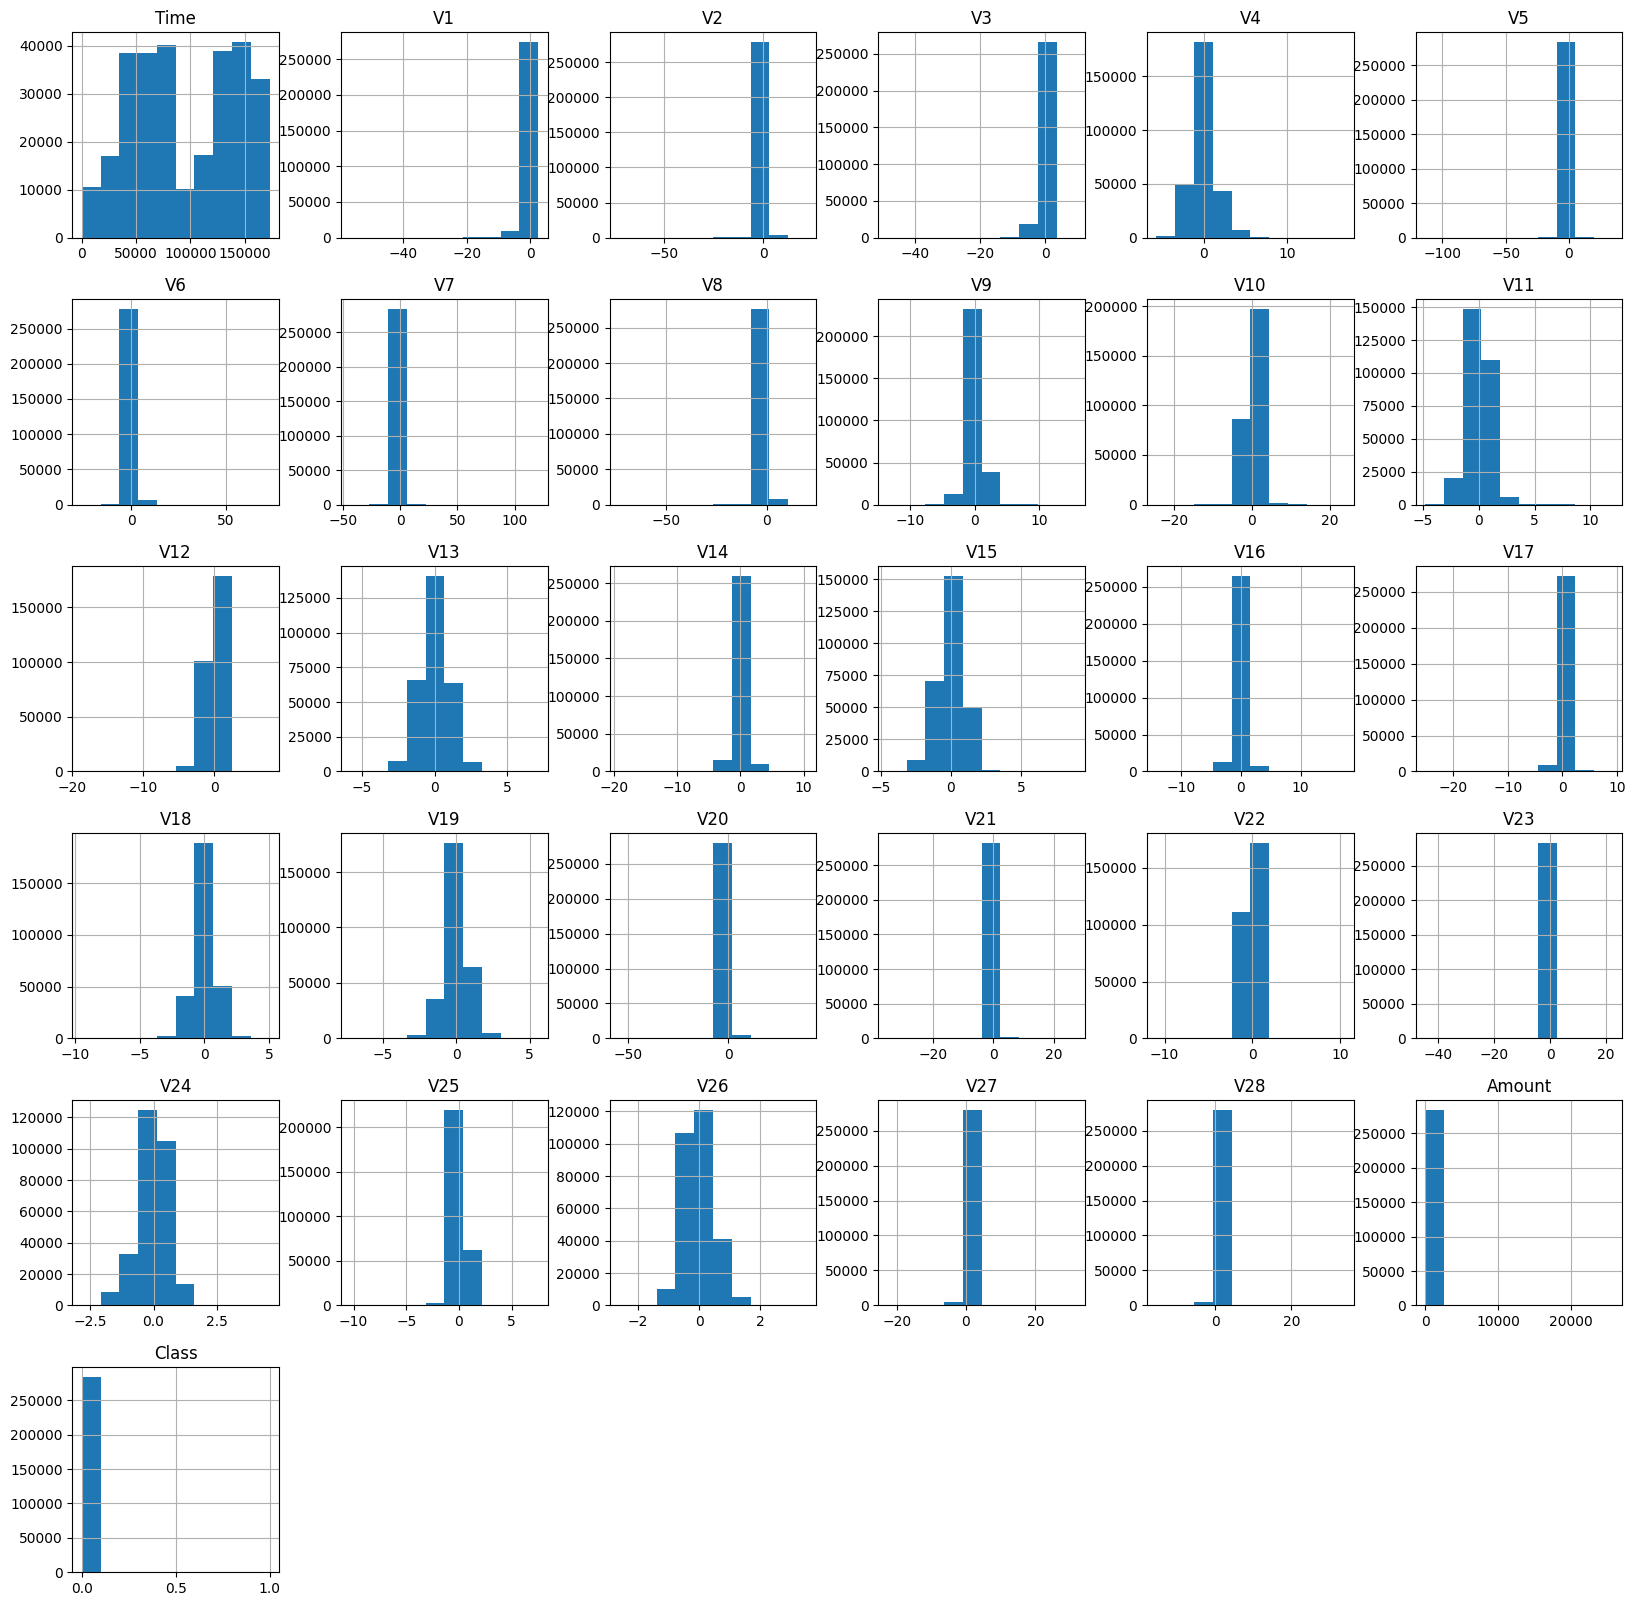

In [139]:
data.hist(figsize=(20,20))
plt.show()

# Removing the Time coloumn and updating with hours and seconds

In [140]:
data['hour']=((data['Time']//3600)//2.).astype('int')
data['second']=(data['Time']%3600).astype('int')
data.drop('Time',axis=1,inplace=True)
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,second
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,2


# Finding the duplicating rows and deleting them

In [141]:
data.duplicated().value_counts()

False    283726
True       1081
Name: count, dtype: int64

In [142]:
data.drop_duplicates(inplace = True)

In [143]:
data.duplicated().value_counts()
data.reset_index(drop = True , inplace = True)

In [144]:
print(data['Class'].value_counts())
print('\n')
print(data['Class'].value_counts(normalize=True))

Class
0    283253
1       473
Name: count, dtype: int64


Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


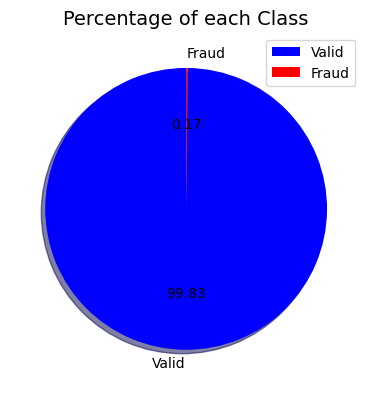

In [145]:
classes=data['Class'].value_counts()
Valid=round(classes[0]/data['Class'].count(), 4)
Fraud=round(classes[1]/data['Class'].count(), 4)
plt.figure(figsize=(10,5))

plt.subplot(122)
plt.title('Percentage of each Class', fontsize=14)
plt.pie(x=[Valid,Fraud],labels=['Valid','Fraud'],
        autopct='%.2f', colors=['blue','red'], startangle=90, shadow=True)
plt.legend(loc='best')

plt.show()

# Preprocessing

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X = data.drop('Class', axis=1)
y = data['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.20)
rob_scaler = RobustScaler()
X_train = rob_scaler.fit_transform(X_train)
X_test = rob_scaler.transform(X_test)  # Corrected to use transform instead of fit_transform




In [147]:
import pickle  # Ensure this is imported
with open('scaler.sav', 'wb') as scaler_file:
    pickle.dump(rob_scaler, scaler_file) 

# Calculating the information gain and selecting the K best features

In [148]:
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
infogain_classif = SelectKBest(score_func=mutual_info_classif, k=6)
infogain_classif.fit(X_train, y_train)
X_train = infogain_classif.transform(X_train)
X_test = infogain_classif.transform(X_test)

for i in range(len(infogain_classif.scores_)):
    print(f'Feature {i} : {round(infogain_classif.scores_[i],4)}')

Feature 0 : 0.0019
Feature 1 : 0.0031
Feature 2 : 0.0047
Feature 3 : 0.0048
Feature 4 : 0.0022
Feature 5 : 0.002
Feature 6 : 0.0037
Feature 7 : 0.0015
Feature 8 : 0.0041
Feature 9 : 0.0074
Feature 10 : 0.0066
Feature 11 : 0.0074
Feature 12 : 0.0002
Feature 13 : 0.0079
Feature 14 : 0.0
Feature 15 : 0.0058
Feature 16 : 0.0079
Feature 17 : 0.004
Feature 18 : 0.001
Feature 19 : 0.0009
Feature 20 : 0.0022
Feature 21 : 0.0002
Feature 22 : 0.0004
Feature 23 : 0.0004
Feature 24 : 0.0002
Feature 25 : 0.0001
Feature 26 : 0.0022
Feature 27 : 0.0016
Feature 28 : 0.0015
Feature 29 : 0.0027
Feature 30 : 0.0


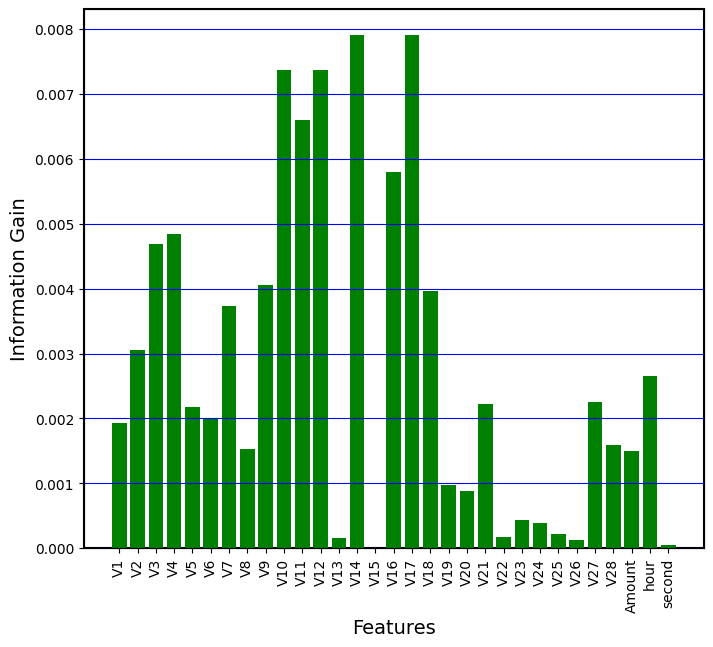

In [149]:
# Ensure you are still referencing the DataFrame from which X_train was created
original_columns = data.drop('Class', axis=1).columns  # Get original column names
plt.bar([original_columns[i] for i in range(len(infogain_classif.scores_))], infogain_classif.scores_, color=['green'])
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,7)
ax = plt.gca()
ax.patch.set_facecolor('white')
ax.yaxis.grid(True, color = 'blue')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth(1.5)  # Changed '1.5' to 1.5
plt.xlabel('Features',fontsize=14)
plt.ylabel('Information Gain',fontsize=14)
plt.show()

In [150]:
df = pd.DataFrame(data, columns=['V10' ,'V11' ,'V12' ,'V14' ,'V16' ,'V17', 'Class'])

X = df.drop('Class', axis=1)
y = df['Class']

In [151]:
train, test = train_test_split(df, test_size = 0.2, random_state=42)

print("Train shape",train.shape)
print("Test shape",test.shape)

Train shape (226980, 7)
Test shape (56746, 7)


In [152]:
X_train  = train.drop('Class', axis=1).values
y_train  = train['Class'].values
print("Before using the sampling techniques")
print(X_train.shape)
print(y_train.shape)

Before using the sampling techniques
(226980, 6)
(226980,)


In [153]:
X_test  = test.drop('Class', axis=1)
y_test  = test['Class']
print(X_test.shape)
print(y_test.shape)

(56746, 6)
(56746,)


In [154]:
X_test  = test
y_test  = test['Class']

X_test_Fraud = X_test[X_test.Class==1]
X_test_Valid = X_test[X_test.Class==0]
y_test_Fraud = y_test[X_test.Class==1]
y_test_Valid = y_test[X_test.Class==0] 

X_test = X_test.drop('Class', axis=1).values
y_test = y_test.values  

X_test_Valid =X_test_Valid.drop('Class', axis=1).values
y_test_Valid = y_test_Valid.values

X_test_Fraud = X_test_Fraud.drop('Class', axis=1).values
y_test_Fraud = y_test_Fraud.values  

In [155]:
print("Number of fraudulent transactions in test dataset",y_test_Fraud.shape)
print("Number of valid transactions in test dataset",y_test_Valid.shape)

Number of fraudulent transactions in test dataset (90,)
Number of valid transactions in test dataset (56656,)


# Optimising LightGBM parameters using Bayesian Optimisation

In [156]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate,KFold,StratifiedKFold
from bayes_opt import BayesianOptimization
from bayes_opt.util import UtilityFunction

def lgbm_cv(learning_rate, max_depth, num_leaves):
    model = LGBMClassifier(learning_rate = learning_rate,
                                num_leaves = int(round(num_leaves)),
                                max_depth = int(round(max_depth)), 
                                class_weight = 'balanced'
                               )
    
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring= 'neg_log_loss')
    return np.mean(scores['test_score'])

# Interval to be explored for input values
params = {'learning_rate': (0.001, 0.2),
           'max_depth': (-1, 8),
           'num_leaves': (2, 250)
          }

lgbmBO = BayesianOptimization(lgbm_cv, params)

utility = UtilityFunction(kind="ei")
lgbmBO.maximize(init_points=5, n_iter=8, acquisition_function=utility)

params_lgbm = lgbmBO.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])  # Ensure these are integers
params_lgbm['num_leaves'] = round(params_lgbm['num_leaves'])
print(params_lgbm)

|   iter    |  target   | learni... | max_depth | num_le... |
-------------------------------------------------------------
[LightGBM] [Info] Number of positive: 307, number of negative: 181277
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 181584, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

# Optimising XGBoost parameters using Bayesian Optimisation

In [157]:
from collections import Counter
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 598.844


In [158]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from bayes_opt import BayesianOptimization
from bayes_opt.util import UtilityFunction

def xgb_cv(learning_rate, max_depth, n_estimators):
    scale_pos_weight = counter[0] / counter[1]
    model = XGBClassifier(learning_rate = learning_rate,
                                max_depth = int(round(max_depth)),
                                n_estimators = int(round(n_estimators)),
                                scale_pos_weight = scale_pos_weight
                          )
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring='neg_log_loss')
    return np.mean(scores['test_score'])

# Interval to be explored for input values
params={'learning_rate': (0.001, 0.2),
           'max_depth': (3, 10),
           'n_estimators': (50, 100)
          }

xgbBO = BayesianOptimization(xgb_cv, params)

utility = UtilityFunction(kind="ei")
xgbBO.maximize(init_points=5, n_iter=8, acquisition_function=utility)

params_xgb = xgbBO.max['params']
params_xgb['max_depth'] = round(params_xgb['max_depth'])
params_xgb['n_estimators'] = round(params_xgb['n_estimators'])
params_xgb['learning_rate'] = round((params_xgb['learning_rate']),4)
print(params_xgb)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
| 1         | -0.004766 | 0.08993   | 9.588     | 81.96     |
| 2         | -0.004819 | 0.1665    | 6.847     | 98.24     |
| 3         | -0.04375  | 0.1611    | 3.597     | 55.93     |
| 4         | -0.005301 | 0.1456    | 8.468     | 63.76     |
| 5         | -0.005162 | 0.1823    | 8.007     | 51.57     |
| 6         | -0.01727  | 0.1456    | 6.059     | 53.85     |
| 7         | -0.1042   | 0.02106   | 8.907     | 84.11     |
| 8         | -0.007881 | 0.06241   | 9.579     | 81.97     |
| 9         | -0.00472  | 0.2       | 9.761     | 81.76     |
| 10        | -0.005209 | 0.14      | 7.189     | 92.71     |
| 11        | -0.1483   | 0.02162   | 5.184     | 87.15     |
| 12        | -0.004758 | 0.2       | 9.238     | 81.72     |
| 13        | -0.007696 | 0.1685    | 7.496     | 52.16     |
{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 82}


In [159]:
from sklearn.model_selection import cross_validate,StratifiedKFold
X = data.drop('Class', axis = 1)
y = data['Class']
Accuracy = []
Precision = []
Recall = []
F1_score = []
ROC_AUC = []
def cv_results(model):
    sk_fold = StratifiedKFold(n_splits=5)
    scoring = ["accuracy","precision","recall","f1","roc_auc"]
    cv_scores = cross_validate(model, X, y, scoring = scoring, cv = sk_fold)
    print("Accuracy : ",cv_scores["test_accuracy"].mean()*100)
    Accuracy.append(cv_scores["test_accuracy"].mean()*100)
    print("Precision : ",cv_scores["test_precision"].mean()*100)
    Precision.append(cv_scores["test_precision"].mean()*100)
    print("Recall : ",cv_scores["test_recall"].mean()*100)
    Recall.append(cv_scores["test_recall"].mean()*100)
    print("F1 Score : ",cv_scores["test_f1"].mean()*100)
    F1_score.append(cv_scores["test_f1"].mean()*100)
    print("ROC AUC : ",cv_scores["test_roc_auc"].mean()*100)
    ROC_AUC.append(cv_scores["test_roc_auc"].mean()*100)

# Calculating the Performance metrices based on Bayesian Optimisation results

In [160]:
from lightgbm import LGBMClassifier
LGBM= LGBMClassifier(learning_rate='0.14905', max_depth='8', num_leaves='123',class_weight='balanced')
cv_results(LGBM)

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [161]:
from xgboost import XGBClassifier
XGB = XGBClassifier(scale_pos_weight=592,learning_rate=0.13,max_depth=9,n_estimators=78)
cv_results(XGB)

Accuracy :  99.91576385121286
Precision :  76.36914098484733
Recall :  78.84658454647257
F1 Score :  76.62534674531783
ROC AUC :  96.96848421579517


In [162]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(class_weight='balanced')
cv_results(LR)

Accuracy :  94.99696825060674
Precision :  6.575140153318075
Recall :  89.21612541993281
F1 Score :  11.639900797957017
ROC AUC :  96.67678762161668


# Smote Analysis

In [163]:
from sklearn.utils import shuffle
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
X = data.drop('Class', axis = 1)
y = data['Class']
def cv_smote(model):
    pipeline1 = make_pipeline(SMOTE(sampling_strategy='minority', k_neighbors = 5, n_jobs=-1, random_state = 42),model)
    sk_fold = StratifiedKFold(n_splits=5)
    scoring = ["accuracy","precision","recall","f1","roc_auc"]
    cv_scores = cross_validate(model, X, y, scoring = scoring, cv = sk_fold)
    print("Accuracy : ",cv_scores["test_accuracy"].mean()*100)
    print("Precision : ",cv_scores["test_precision"].mean()*100)
    print("Recall : ",cv_scores["test_recall"].mean()*100)
    print("F1 Score : ",cv_scores["test_f1"].mean()*100)
    print("ROC AUC : ",cv_scores["test_roc_auc"].mean()*100)

In [164]:
from lightgbm import LGBMClassifier
lightgbm1 = LGBMClassifier()
cv_smote(lightgbm1)

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001665 -> initscore=-6.396056
[LightGBM] [Info] Start training from score -6.396056
[LightGBM] [Info] Number of positive: 379, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7673
[LightGBM] [Info] Number of data points in the train set: 226981, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001670 -> initscore=-6.393414
[LightGBM] [Info] Start training from score -6.393414
[LightGBM] [

In [165]:
from xgboost import XGBClassifier 
xgboost1 = XGBClassifier()
cv_smote(xgboost1)

Accuracy :  99.93479635887965
Precision :  85.24568956835256
Recall :  78.0
F1 Score :  80.45699858576079
ROC AUC :  97.04958074963285


In [166]:
from catboost import CatBoostClassifier
catboost1 = CatBoostClassifier(verbose=False)
cv_smote(catboost1)

Accuracy :  99.6228801253093
Precision :  74.04650620386353
Recall :  78.63157894736842
F1 Score :  68.67877352447422
ROC AUC :  96.58512183491948


In [167]:
LR1 = LogisticRegression(class_weight='balanced')
cv_smote(LR1)

Accuracy :  94.99696825060674
Precision :  6.575140153318075
Recall :  89.21612541993281
F1 Score :  11.639900797957017
ROC AUC :  96.67678762161668


In [168]:
from sklearn.ensemble import VotingClassifier

Model1 = [('lightgbm', LGBM), ('xgboost', XGB), ('catboost', catboost1)]
Model2 = [('lightgbm', LGBM), ('xgboost', XGB)]
Model3 = [('catboost', catboost1), ('xgboost', XGB)]
Model4 = [('lightgbm', LGBM), ('catboost', catboost1)]

voting1 = VotingClassifier(estimators=Model1,voting='soft')
voting2 = VotingClassifier(estimators=Model2,voting='soft')
voting3 = VotingClassifier(estimators=Model3,voting='soft')
voting4 = VotingClassifier(estimators=Model4,voting='soft')

In [169]:
cv_results(voting1)

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [170]:
cv_results(voting2)

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [171]:
cv_results(voting3)

Accuracy :  99.9298621152293
Precision :  83.4597563193308
Recall :  79.05935050391938
F1 Score :  79.90832168578821
ROC AUC :  96.8423668275434


In [172]:
cv_results(voting4)

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,


# Undersampling


In [173]:
from sklearn.utils import shuffle
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
X = data.drop('Class', axis = 1)
y = data['Class']
def cv_undersampler(model):
    pipeline2 = make_pipeline(RandomUnderSampler(sampling_strategy='majority',random_state = 42),model)
    sk_fold = StratifiedKFold(n_splits=5)
    scoring = ["accuracy","precision","recall","f1","roc_auc"]
    cv_values = cross_validate(model, X, y, scoring = scoring, cv = sk_fold)
    print("Accuracy : ",cv_values["test_accuracy"].mean()*100)
    print("Precision : ",cv_values["test_precision"].mean()*100)
    print("Recall : ",cv_values["test_recall"].mean()*100)
    print("F1 Score : ",cv_values["test_f1"].mean()*100)
    print("ROC AUC : ",cv_values["test_roc_auc"].mean()*100)

In [174]:
lightgbm2 = LGBMClassifier()
cv_undersampler(lightgbm2)

[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001665 -> initscore=-6.396056
[LightGBM] [Info] Start training from score -6.396056
[LightGBM] [Info] Number of positive: 379, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7673
[LightGBM] [Info] Number of data points in the train set: 226981, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001670 -> initscore=-6.393414
[LightGBM] [Info] Start training from score -6.393414
[LightGBM] [

In [175]:
xgboost2 = XGBClassifier()
cv_undersampler(xgboost2)

Accuracy :  99.93479635887965
Precision :  85.24568956835256
Recall :  78.0
F1 Score :  80.45699858576079
ROC AUC :  97.04958074963285


In [176]:
catboost2 = CatBoostClassifier(verbose=False)
cv_undersampler(catboost2)

Accuracy :  99.6228801253093
Precision :  74.04650620386353
Recall :  78.63157894736842
F1 Score :  68.67877352447422
ROC AUC :  96.58512183491948


In [177]:
from sklearn.linear_model import LogisticRegression
LR2 = LogisticRegression(class_weight='balanced')
cv_undersampler(LR2)

Accuracy :  94.99696825060674
Precision :  6.575140153318075
Recall :  89.21612541993281
F1 Score :  11.639900797957017
ROC AUC :  96.67678762161668


In [178]:
models =[LR,LGBM, XGB, catboost1, voting1, voting2, voting3, voting4]
names = ["LR","LGBM", "XGB", "CatBoost","Vot_Lg,Xg,Ca", "Vot_Lg,Xg","Vot_Xg,Ca", "Vot_Lg,Ca"] 

In [179]:
from sklearn.metrics import matthews_corrcoef
X = data.drop(['Class'] ,axis=1)
y = data['Class']
i=0
j=0 
for model in models:
    cv = StratifiedKFold(n_splits=5)
    MCC = []
    for train, test in cv.split(X, y):
        pred = model.fit(X.iloc[train], y.iloc[train]).predict(X.iloc[test])
        MCC.append(matthews_corrcoef(y.iloc[test], pred)) 
        i+=1
    mean_MCC = np.mean(MCC)
    print("MCC : " ,mean_MCC,"\n") 
    print("***************************************")  
    i=0
    j=j+1

MCC :  0.2154011247768282 

***************************************
[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [180]:
MCC = [21.54011247768282 ,77.19305488939379,77.07397347540061 , 71.43942448302167,79.76168690985029, 78.28807949649248,80.54581445152402 ,78.59387225376204 ]

In [181]:
Accuracy = np.array(Accuracy)
Precision = np.array(Precision)
Recall = np.array(Recall)
F1_score = np.array(F1_score)
MCC = np.array(MCC)
ROC_AUC = np.array(ROC_AUC)

Accuracy = np.round(Accuracy, 2)
Precision = np.round(Precision, 2)
Recall = np.round(Recall, 2)
F1_score = np.round(F1_score, 2)
MCC = np.round(MCC, 2)
ROC_AUC = np.round(ROC_AUC, 2)

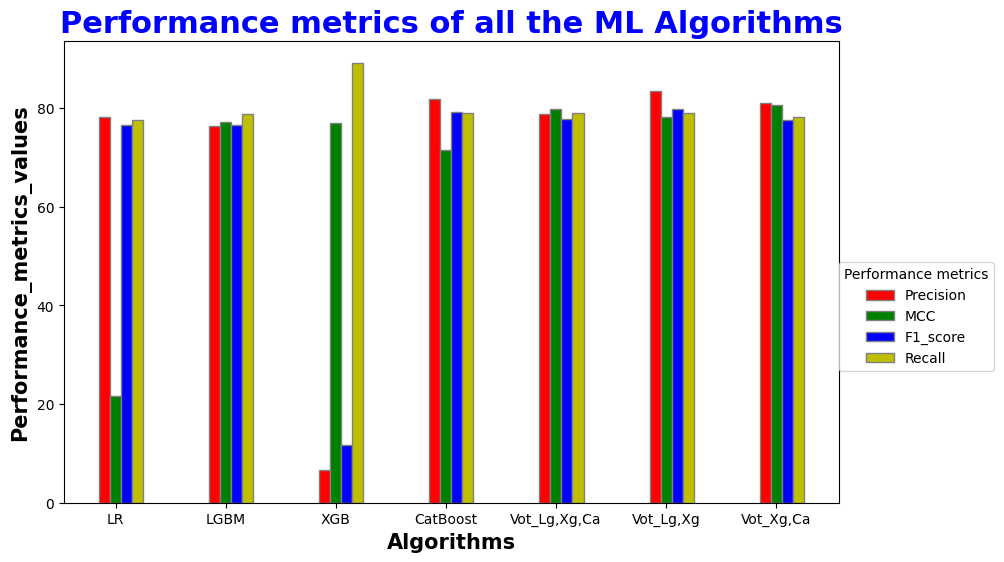

In [182]:
barWidth = 0.1
fig = plt.subplots(figsize =(10, 6))

# Truncate MCC to match the length of other lists
MCC = MCC[:7]

# Set position of bars on X axis
br1 = np.arange(len(F1_score))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, Precision, color ='r', width = barWidth, edgecolor ='grey', label ='Precision')
plt.bar(br2, MCC, color ='g', width = barWidth, edgecolor ='grey', label ='MCC')
plt.bar(br3, F1_score, color ='b', width = barWidth, edgecolor ='grey', label ='F1_score')
plt.bar(br4, Recall, color ='y', width = barWidth, edgecolor ='grey', label ='Recall')

# Adding Xticks
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 15)
plt.ylabel('Performance_metrics_values', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(F1_score))], ["LR", "LGBM", "XGB", "CatBoost", "Vot_Lg,Xg,Ca", "Vot_Lg,Xg", "Vot_Xg,Ca"])
plt.title("Performance metrics of all the ML Algorithms", fontweight ='bold', fontsize = 22, color ='b')
plt.legend(bbox_to_anchor =(1.1, 0.27), loc='lower center', title="Performance metrics")
plt.show()


[LightGBM] [Info] Number of positive: 378, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7671
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

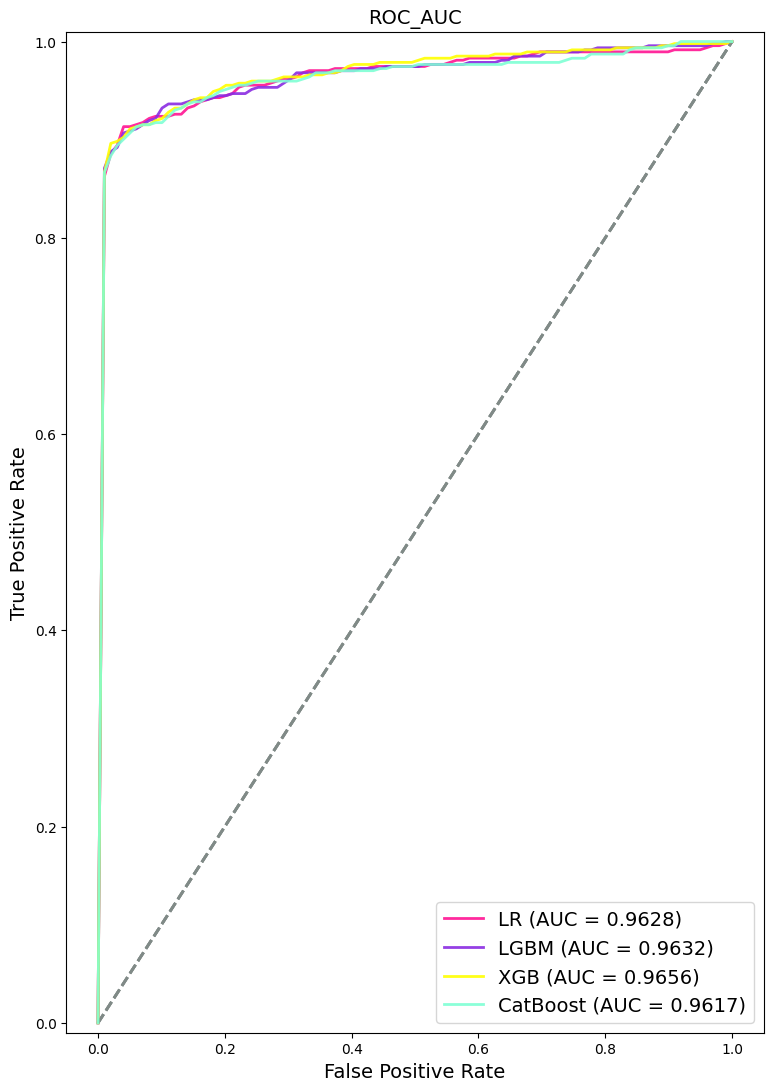

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# Placeholder for your data and models
# data = ...  # Load your dataset here
# models = [...]  # List of your model instances

colors = ['#ff1493', '#8A2BE2', '#FFFF00', '#7FFFD4']  # Ensure this matches your number of models
names = ['LR', 'LGBM', 'XGB', 'CatBoost']  # Update with your model names

X = data.drop(['Class'], axis=1)
y = data['Class']

f, axes = plt.subplots(ncols=1, nrows=1, figsize=(9, 13))

j = 0
for model in models:
    # Ensure we do not exceed the colors and names length
    if j >= len(colors) or j >= len(names):
        print("Warning: Not enough colors or names for the number of models.")
        break  # Exit the loop if we run out of colors or names

    cv = StratifiedKFold(n_splits=5)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train, test in cv.split(X, y):
        probas_ = model.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))  # Interpolate TPR
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    
    axes.plot([0, 1], [0, 1], linestyle='--', lw=2, color='#808A87', alpha=.8)
    axes.plot(mean_fpr, mean_tpr, color=colors[j],
              label=r'%s (AUC = %0.4f)' % (names[j], mean_auc),
              linestyle='-', lw=2, alpha=0.9)

    j += 1

axes.legend(loc="lower right", prop={'size': 14})
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC_AUC', fontsize=14)
plt.ylim([-0.01, 1.01])
plt.show()


In [184]:
!pip install prettytable

In [185]:
from prettytable import PrettyTable

# Column headers
columns = ["Algorithm_name", "Accuracy", "Precision", "Recall", "F1", "MCC", "ROC_AUC"]

# Create PrettyTable object
myTable = PrettyTable()
myTable._max_width = {"Algorithm_name": 3, "Accuracy": 4, "Precision": 4, "Recall": 4, "F1-Score": 4, "MCC": 6, "ROC_AUC": 4}

# Add Columns (adjust the length to match)
algorithm_names = ["LR", "LGBM", "XGB", "CatBoost", "Vot_Lg,Xg,Ca", "Vot_Lg,Xg", "Vot_Xg,Ca"]
myTable.add_column(columns[0], algorithm_names)
myTable.add_column(columns[1], Accuracy)
myTable.add_column(columns[2], Precision)
myTable.add_column(columns[3], Recall)
myTable.add_column(columns[4], F1_score)
myTable.add_column(columns[5], MCC)
myTable.add_column(columns[6], ROC_AUC)

# Print the table
print(myTable)


+----------------+----------+-----------+--------+-------+-------+---------+
| Algorithm_name | Accuracy | Precision | Recall |   F1  |  MCC  | ROC_AUC |
+----------------+----------+-----------+--------+-------+-------+---------+
|       LR       |  99.92   |   78.31   | 77.58  | 76.53 | 21.54 |  96.74  |
|      LGBM      |  99.92   |   76.37   | 78.85  | 76.63 | 77.19 |  96.97  |
|      XGB       |   95.0   |    6.58   | 89.22  | 11.64 | 77.07 |  96.68  |
|    CatBoost    |  99.93   |   81.79   | 79.06  | 79.18 | 71.44 |  96.86  |
|  Vot_Lg,Xg,Ca  |  99.92   |   78.83   | 79.06  | 77.71 | 79.76 |  97.03  |
|   Vot_Lg,Xg    |  99.93   |   83.46   | 79.06  | 79.91 | 78.29 |  96.84  |
|   Vot_Xg,Ca    |  99.92   |   81.04   | 78.21  | 77.67 | 80.55 |   96.7  |
+----------------+----------+-----------+--------+-------+-------+---------+


In [186]:
undersampler = RandomUnderSampler(sampling_strategy='majority',random_state = 42)
X_resampled,y_resampled = undersampler.fit_resample(X,y)
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.15,stratify=y_resampled,random_state=42)
# Final training after hyperparameter tuning
light = LGBMClassifier(**params_lgbm)  # Ensure you use the best params
light.fit(X_train, y_train)  # Fit the model with training data
y_pred = light.predict(X_test)

[LightGBM] [Info] Number of positive: 402, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7674
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

In [187]:
import pickle
filename='creditcard.sav'
pickle.dump(light,open(filename,'wb'))

loaded_model=pickle.load(open('creditcard.sav','rb'))